In [166]:
# UNCOMMENT BELOW IF YOU RUN FOR THE FIRST TIME
# !pip install mnist
# !pip install keras

In [167]:
# UNCOMMENT IF YOU RUN FOR THE FIRST TIME
# !pip install tensorflow

In [168]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [169]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [170]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [171]:
np.unique(y_train), np.unique(y_test)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [172]:
y_train_idx = np.where((y_train == 3) | (y_train == 8))[0]
y_test_idx = np.where((y_test == 3) | (y_test == 8))[0]

In [173]:
x_train = x_train[y_train_idx, :]
y_train = y_train[y_train_idx]

x_test = x_test[y_test_idx, :]
y_test = y_test[y_test_idx]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11982, 28, 28), (11982,), (1984, 28, 28), (1984,))

In [174]:
np.unique(y_train), np.unique(y_test)

(array([3, 8], dtype=uint8), array([3, 8], dtype=uint8))

In [175]:
y_train[y_train == 3] = 0
y_train[y_train == 8] = 1
y_test[y_test == 3] = 0
y_test[y_test == 8] = 1

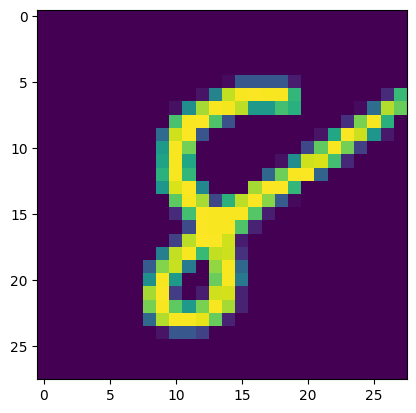

In [176]:
import matplotlib.pyplot as plt

plt.imshow(x_train[110])
plt.show()

In [177]:
x_train = x_train / 255.
x_test = x_test / 255.

In [178]:
x_train = x_train - np.mean(x_train)
x_test = x_test - np.mean(x_train)

np.mean(x_train)

5.132851280394273e-18

In [179]:
x_train[0].shape

(28, 28)

In [180]:
x_train = np.expand_dims(x_train, axis=3)
x_train[0].shape

(28, 28, 1)

In [181]:
x_test = np.expand_dims(x_test, axis=3)

In [182]:
yi = to_categorical(y_train)
yi[0], y_train[0]

(array([1., 0.], dtype=float32), 0)

In [183]:
yi[110], y_train[110]

(array([0., 1.], dtype=float32), 1)

In [184]:
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)


In [185]:
model = Sequential([
    Conv2D(2, 3, input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=2),
    # Conv2D(64, 3),
    # Conv2D(128, 3),
    # Conv2D(256, 3),
    # Conv2D(512, 3),
    # MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2, activation='softmax')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 26, 26, 2)         20        
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 2)         0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 338)               0         
                                                                 
 dense_6 (Dense)             (None, 2)                 678       
                                                                 
Total params: 698 (2.73 KB)
Trainable params: 698 (2.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [186]:
model.compile(
    "adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [187]:
result = model.fit(
    x_train,
    y_train_oh,
    epochs=3,
    validation_data=(x_test, y_test_oh)
)

Epoch 1/3
375/375 [==============================] - 2s 3ms/step - loss: 0.2286 - accuracy: 0.9212 - val_loss: 0.1331 - val_accuracy: 0.9526
Epoch 2/3
375/375 [==============================] - 1s 3ms/step - loss: 0.1084 - accuracy: 0.9642 - val_loss: 0.1352 - val_accuracy: 0.9476
Epoch 3/3
375/375 [==============================] - 1s 3ms/step - loss: 0.0946 - accuracy: 0.9696 - val_loss: 0.1359 - val_accuracy: 0.9471


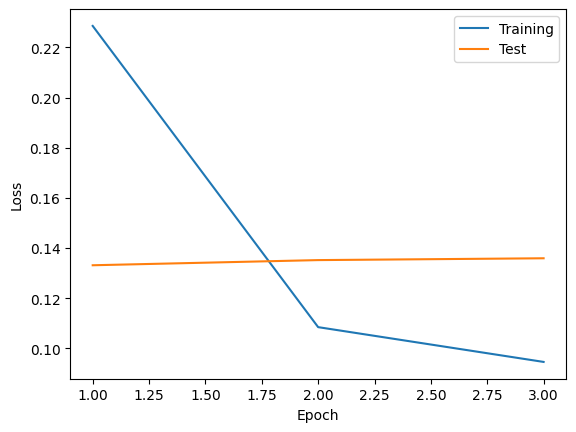

In [188]:
import matplotlib.pyplot as plt

_ = plt.figure()
plt.plot(range(1, len(result.history["loss"])+1), result.history["loss"], label="Training")
plt.plot(range(1, len(result.history["val_loss"])+1), result.history["val_loss"], label="Test")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

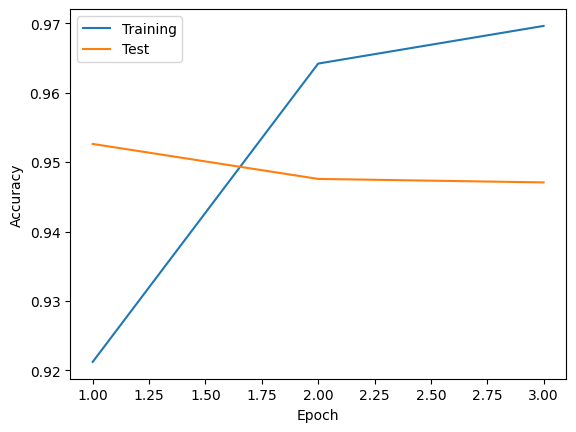

In [189]:
_ = plt.figure()
plt.plot(range(1, len(result.history["accuracy"])+1), result.history["accuracy"], label="Training")
plt.plot(range(1, len(result.history["val_accuracy"])+1), result.history["val_accuracy"], label="Test")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [190]:
pred = model.predict(np.expand_dims(x_test[10], axis=0))[0]
pred

1/1 [==============================] - 0s 44ms/step


array([0.99110025, 0.00889972], dtype=float32)

1/1 [==============================] - 0s 16ms/step


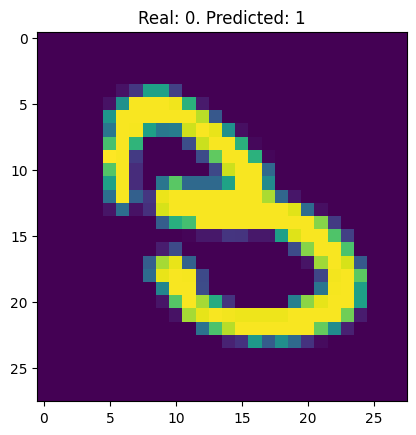

1/1 [==============================] - 0s 17ms/step


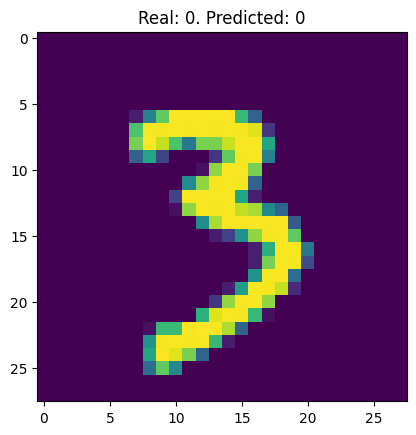

1/1 [==============================] - 0s 19ms/step


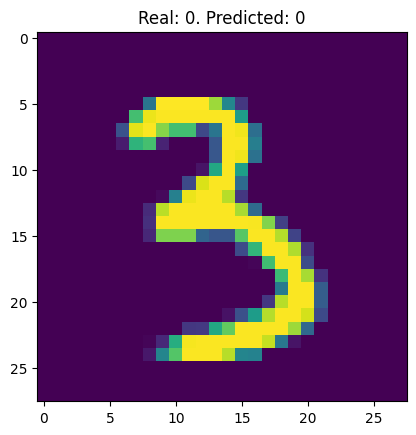

1/1 [==============================] - 0s 19ms/step


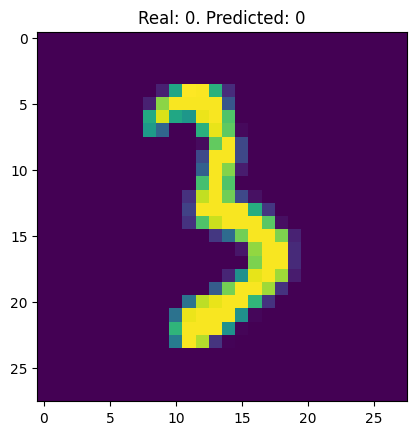

1/1 [==============================] - 0s 18ms/step


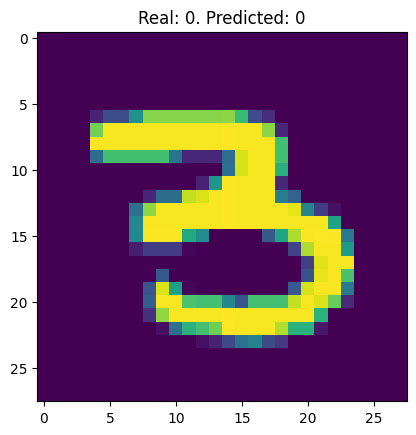

In [191]:
for i in range(5):
    pred = np.argmax(model.predict(np.expand_dims(x_test[i], axis=0))[0])
    plt.imshow(x_test[i])
    plt.title(f"Real: {y_test[i]}. Predicted: {pred}")
    plt.show()

In [192]:
from sklearn.metrics import confusion_matrix


In [193]:
y_train_pred = []
y_train_pred_probs = []
for xi in x_train[:100]:
  yi_probs = model.predict(np.expand_dims(xi, axis=0))[0]
  yi = np.argmax(yi_probs)
  y_train_pred.append(yi)
  y_train_pred_probs.append(yi_probs[0])


1/1 [==============================] - 0s 17ms/step


In [194]:
y_test_pred = []
y_test_pred_probs = []
for xi in x_test[:100]:
  yi_probs = model.predict(np.expand_dims(xi, axis=0))[0]
  yi = np.argmax(yi_probs)
  y_test_pred.append(yi)
  y_test_pred_probs.append(yi_probs[0])


1/1 [==============================] - 0s 19ms/step


In [195]:
cm_train = confusion_matrix(y_train[:100], y_train_pred)

In [196]:
cm_test = confusion_matrix(y_test[:100], y_test_pred)

In [197]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_train_disp = ConfusionMatrixDisplay(cm_train, display_labels=np.unique(y_train))
cm_test_disp = ConfusionMatrixDisplay(cm_test, display_labels=np.unique(y_train))

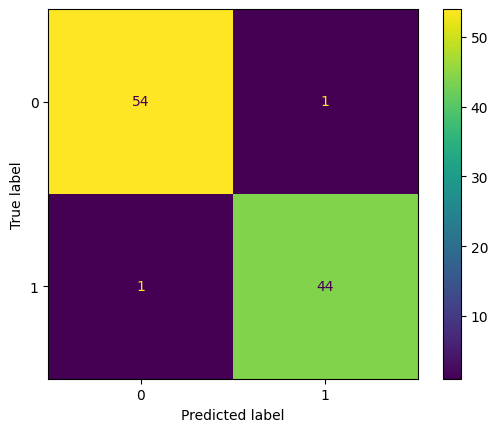

In [198]:
cm_train_disp.plot()

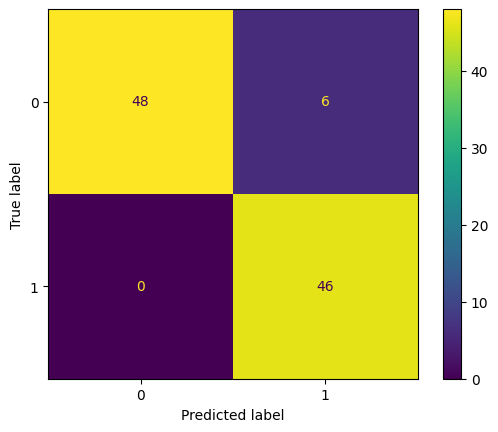

In [199]:
cm_test_disp.plot()

In [200]:
from sklearn.metrics import precision_recall_curve

precision, recall, th = precision_recall_curve(y_train[:100], y_train_pred)

In [201]:
precision[-1], recall[-1], th[-1]

(1.0, 0.0, 1)

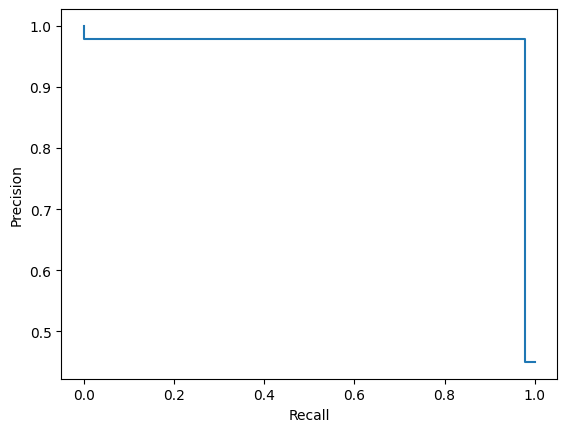

In [202]:
from sklearn.metrics import PrecisionRecallDisplay

pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
pr_display.plot()
plt.show()

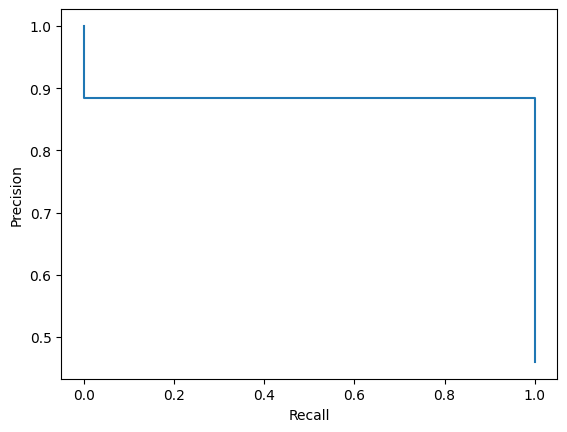

In [203]:
precision, recall, th = precision_recall_curve(y_test[:100], y_test_pred)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall)
pr_display.plot()
plt.show()

In [204]:
from sklearn.metrics  import roc_curve, RocCurveDisplay

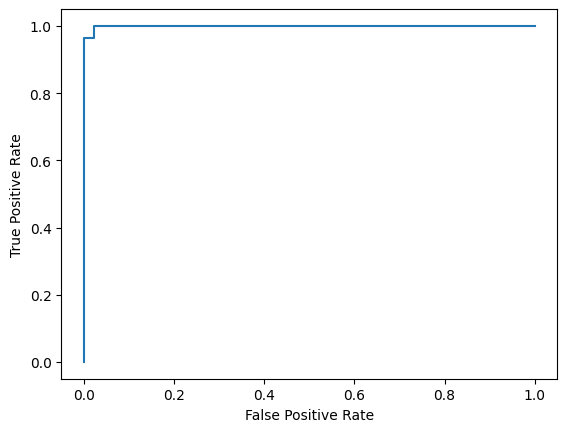

In [207]:
tpr, fpr, _ = roc_curve(y_train[:100], y_train_pred_probs)
disp = RocCurveDisplay(tpr=tpr, fpr=fpr)
disp.plot()
plt.show()

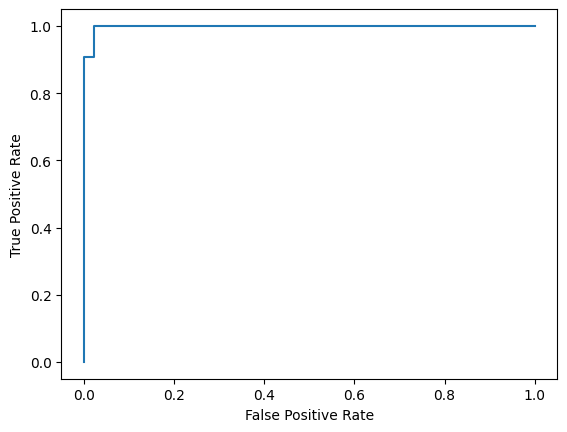

In [212]:
tpr, fpr, _ = roc_curve(y_test[:100], y_test_pred_probs)
disp = RocCurveDisplay(tpr=tpr, fpr=fpr)
disp.plot()
plt.show()

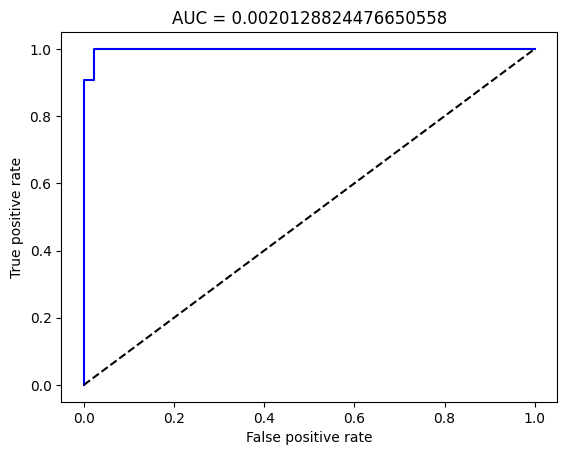

In [219]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test[:100], y_test_pred_probs)

_ = plt.figure()
plt.plot(fpr, tpr, c='blue')
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), "k--")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title(f"AUC = {auc}")
plt.show()

In [216]:
np.linspace(0, 1, 100)

array([0])